## TO: visualization of examples

In [1]:
from astropy.io import fits
from astropy import wcs
import datetime
import astropy.time as astime
import sys
import os
import glob
import gzip
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
#matplotlib.rc_file("../../templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm

In [2]:
main_path = '/home/oem/Documentos/Astronomy/CRTS/Data/'
df_objects = pd.read_pickle(main_path + 'TOsample.pkl')
df_objects.head(15)

,CRTS ID,Class,DEC,Mag,RA,URL LC
0,CSS160605:113003+280648,CV,28.11336,18.58,172.51287,http://nesssi.cacr.caltech.edu/catalina/201606...
1,CSS160528:162350-121731,CV,-12.29200,17.24,245.96030,http://nesssi.cacr.caltech.edu/catalina/201605...
2,CSS151204:035824+395528,CV,39.92433,17.77,59.59954,http://nesssi.cacr.caltech.edu/catalina/201512...
3,CSS160910:164807+543702,SN,54.61719,18.52,252.02731,http://nesssi.cacr.caltech.edu/catalina/201609...
4,CSS160530:100805+465751,SN,46.96420,19.19,152.02003,http://nesssi.cacr.caltech.edu/catalina/201605...
5,CSS101017:014532+253215,SN,25.53758,17.53,26.38296,http://nesssi.cacr.caltech.edu/catalina/201010...
6,CSS151102:011316-063052,BZ,-6.51454,18.55,18.31757,http://nesssi.cacr.caltech.edu/catalina/201511...
7,CSS130509:123251+123111,BZ,12.51982,18.54,188.21436,http://nesssi.cacr.caltech.edu/catalina/201305...
8,CSS120330:121724-135621,BZ,-13.93905,19.19,184.34835,http://nesssi.cacr.caltech.edu/catalina/201203...
9,CSS170519:155520+421151,FLARES,42.19743,17.97,238.83319,http://nesssi.cacr.caltech.edu/catalina/201705...


In [17]:
#object to visualize
TO = df_objects.iloc[0]
ra_obj = float(TO['RA'])
dec_obj = float(TO['DEC'])
#build complete path to ims
path_to_object = main_path + TO['Class'] + '/' + TO['CRTS ID'] + '/'
print(path_to_object)
df_ims_obj =  pd.read_pickle(path_to_object + TO['CRTS ID'] + '.pkl')
LC_array_obj = np.load(path_to_object + TO['CRTS ID'] + '.npy')

/home/oem/Documentos/Astronomy/CRTS/Data/CV/CSS160605:113003+280648/


In [18]:
df_ims_obj.head()

,CENTER_DEC,CENTER_RA,FILENAME,OBS-DATE
200,28.0905238448,172.488574726,01_04JAN28_N26056_0002_cutout_1432.fits,2004-01-28
254,28.0898437349,172.4768561,01_04JAN28_N26056_0001_cutout_1432.fits,2004-01-28
255,28.0915848808,172.472826708,01_04JAN28_N26056_0003_cutout_1432.fits,2004-01-28
195,28.0914157221,172.483046064,01_04JAN28_N26056_0004_cutout_1432.fits,2004-01-28
242,28.1033680154,172.490714567,01_04FEB13_N26056_0004_cutout_1432.fits,2004-02-13


Year with max magnitude: 2006.086246690411   2006-02-01 11:31:15.629


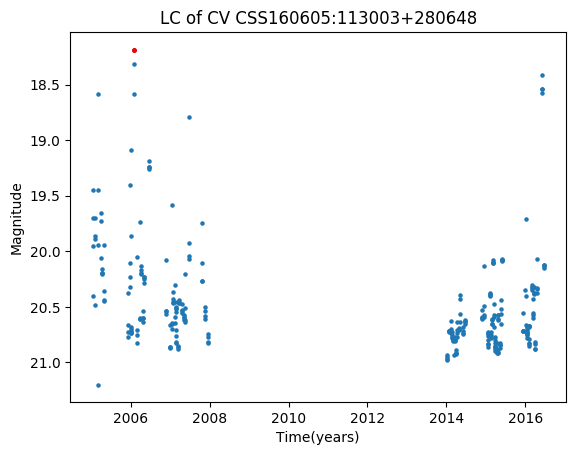

In [19]:
#visualize light curve of the object
years = LC_array_obj[:,0]
magnitude = LC_array_obj[:,1]
v_binary = years <2012
subsample_mags = magnitude[v_binary]
max_mag = np.min(subsample_mags)
pos = np.where(magnitude == max_mag)
change_year = astime.Time(years[pos[0][0]], format='decimalyear')
print('Year with max magnitude:' , years[pos[0][0]], ' ', change_year.iso)
f, ax1 = plt.subplots(1, 1)
ax1.scatter(LC_array_obj[:,0], LC_array_obj[:,1], s = 5)
ax1.scatter(years[pos[0][0]], max_mag, color = 'r', s = 6)
ax1.set_xlabel('Time(years)')
ax1.set_ylabel('Magnitude')
ax1.set_title('LC of '+ TO['Class']+ ' ' + TO['CRTS ID'])
#ax1.gca().invert_yaxis()
ax1.invert_yaxis()
plt.show()

In [20]:
str_year = str(int(years[pos[0][0]]))
str_year_YY_MM = change_year.iso[0:7]
#sub_df_ims = df_ims_obj[df_ims_obj['FILENAME'].str.contains('01_' + str_year[2:4])]
sub_df_ims = df_ims_obj[df_ims_obj['OBS-DATE'].str.contains(str_year_YY_MM)]
sub_df_ims.head()

,CENTER_DEC,CENTER_RA,FILENAME,OBS-DATE
268,28.1434704475,172.497263917,01_06FEB01_N26056_0003_cutout_1431.fits,2006-02-01
9,28.14894811,172.488074983,01_06FEB01_N26056_0001_cutout_1431.fits,2006-02-01
220,28.0778863104,172.488163936,01_06FEB01_N26056_0002_cutout_1430.fits,2006-02-01
23,28.144834618,172.479645729,01_06FEB01_N26056_0004_cutout_1431.fits,2006-02-01
362,28.0877083042,172.508304749,01_06FEB27_FB2703_0002_cutout_2315.fits,2006-02-27


Filename: 01_06FEB01_N26056_0003_cutout_1431.fits
World crds OBJ: [[172.51287  28.11336]]
Pixel coordinates OBJ: [[40.35982353 16.59315244]]


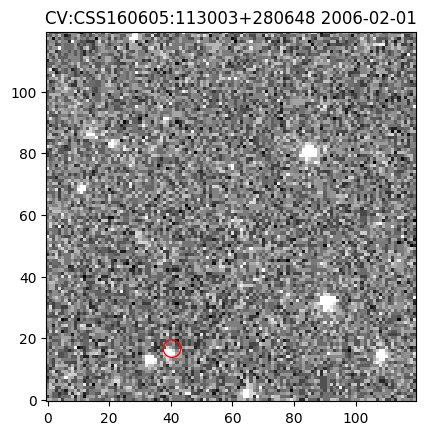

Filename: 01_06FEB01_N26056_0001_cutout_1431.fits
World crds OBJ: [[172.51287  28.11336]]
Pixel coordinates OBJ: [[28.71409249  8.67994798]]


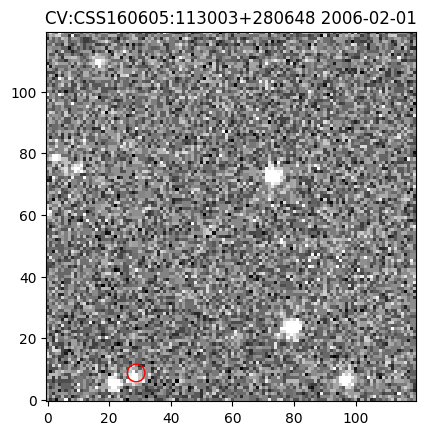

Filename: 01_06FEB01_N26056_0002_cutout_1430.fits
World crds OBJ: [[172.51287  28.11336]]
Pixel coordinates OBJ: [[ 28.50497341 110.94117157]]


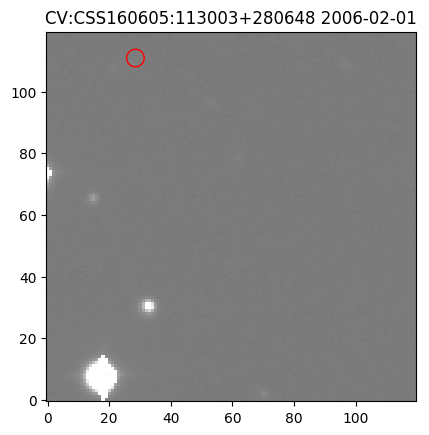

Filename: 01_06FEB01_N26056_0004_cutout_1431.fits
World crds OBJ: [[172.51287  28.11336]]
Pixel coordinates OBJ: [[18.00844603 14.55905956]]


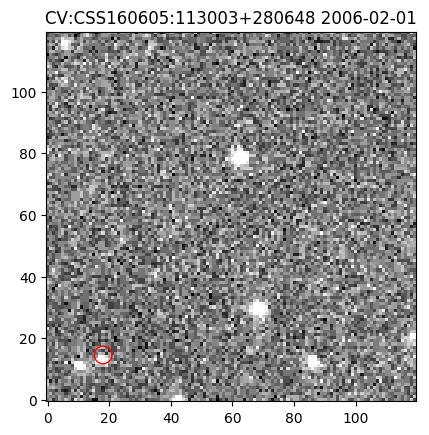

Filename: 01_06FEB27_FB2703_0002_cutout_2315.fits
World crds OBJ: [[172.51287  28.11336]]
Pixel coordinates OBJ: [[53.8413077 96.8291424]]


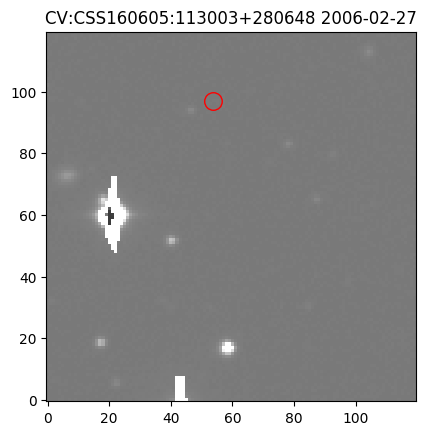

Filename: 01_06FEB27_N26056_0004_cutout_1432.fits
World crds OBJ: [[172.51287  28.11336]]
Pixel coordinates OBJ: [[ 7.56290478 71.8471411 ]]


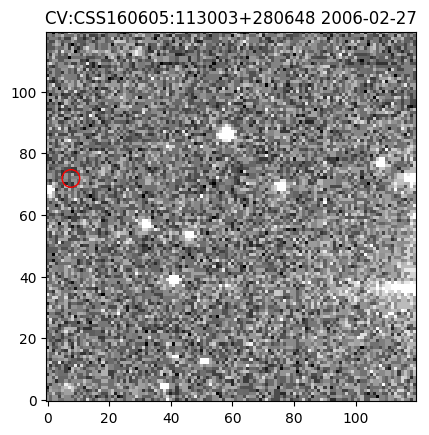

Filename: 01_06FEB27_FB2703_0003_cutout_2316.fits
World crds OBJ: [[172.51287  28.11336]]
Pixel coordinates OBJ: [[66.14604464  1.50725107]]


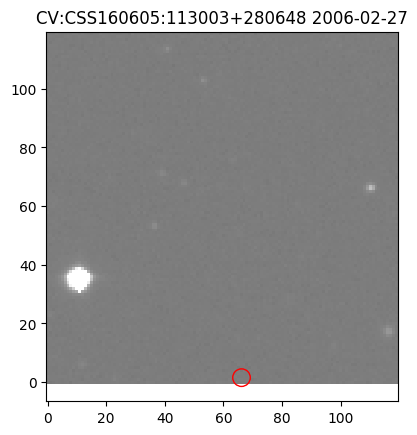

Filename: 01_06FEB27_FB2703_0003_cutout_2315.fits
World crds OBJ: [[172.51287  28.11336]]
Pixel coordinates OBJ: [[ 66.14604464 121.50725107]]


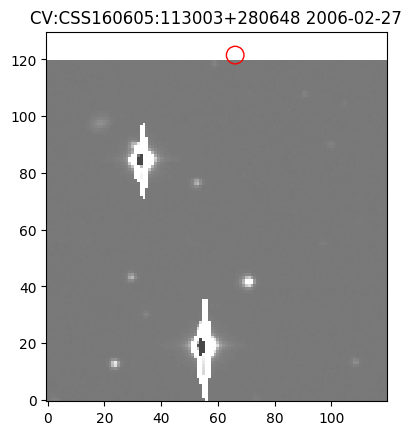

Filename: 01_06FEB27_N26056_0003_cutout_1432.fits
World crds OBJ: [[172.51287  28.11336]]
Pixel coordinates OBJ: [[26.9557116  74.64371308]]


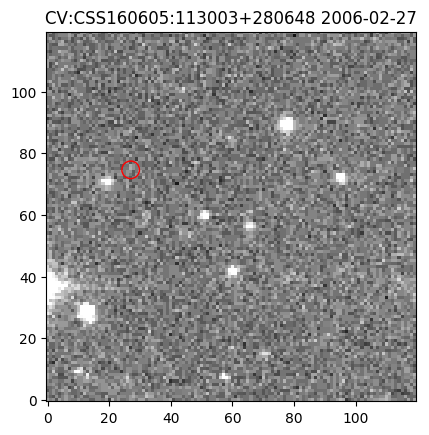

Filename: 01_06FEB27_FB2703_0004_cutout_2316.fits
World crds OBJ: [[172.51287  28.11336]]
Pixel coordinates OBJ: [[41.99832744 -1.23638007]]


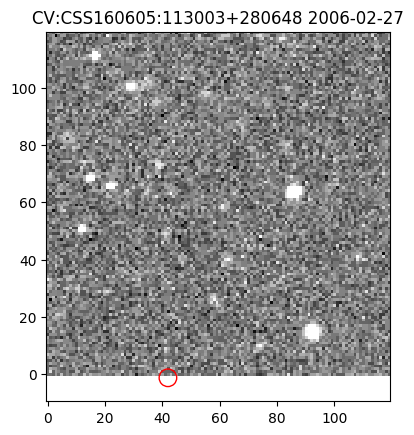

Filename: 01_06FEB27_N26056_0001_cutout_1432.fits
World crds OBJ: [[172.51287  28.11336]]
Pixel coordinates OBJ: [[16.93712675 68.8451454 ]]


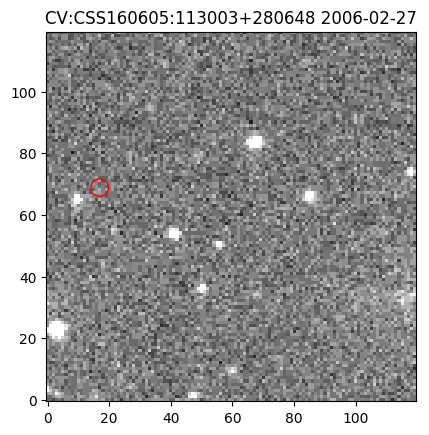

Filename: 01_06FEB27_FB2703_0004_cutout_2315.fits
World crds OBJ: [[172.51287  28.11336]]
Pixel coordinates OBJ: [[ 41.99832744 118.76361993]]


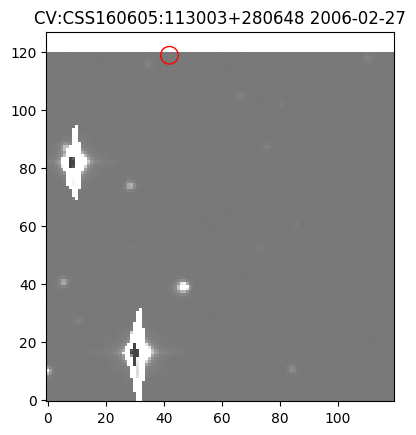

Filename: 01_06FEB27_N26056_0002_cutout_1432.fits
World crds OBJ: [[172.51287  28.11336]]
Pixel coordinates OBJ: [[17.69259129 50.34322575]]


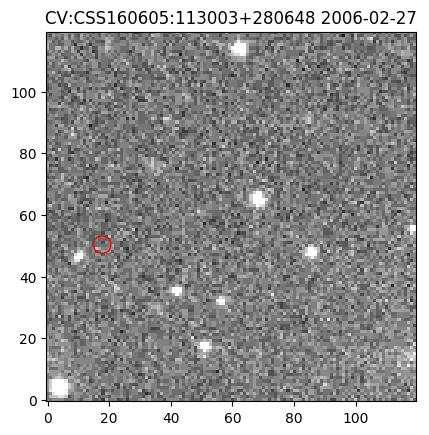

Filename: 01_06FEB27_FB2703_0001_cutout_2315.fits
World crds OBJ: [[172.51287  28.11336]]
Pixel coordinates OBJ: [[ 55.42314803 110.76568356]]


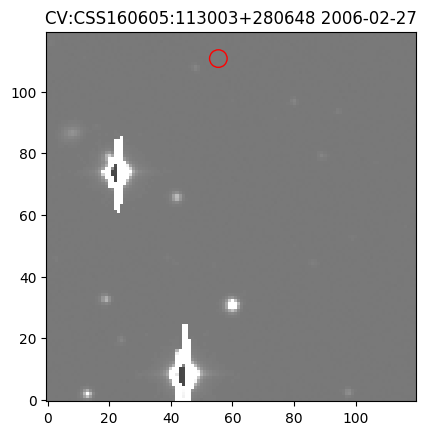

In [23]:
#read images close to the max magnitude
worldcrd_obj = np.array([[ra_obj, dec_obj]]) 
for index, row in sub_df_ims.iterrows():
    filename_from_df = row['FILENAME']
    hdu_list = fits.open(path_to_object + filename_from_df)
    image_data = hdu_list[0].data
    w = wcs.WCS(hdu_list[0].header)
    inf_value = np.mean(image_data)- 2.5*np.std(image_data)
    sup_value = np.mean(image_data)+ 2.5*np.std(image_data)
    print('Filename:', filename_from_df)
    print('World crds OBJ:', worldcrd_obj)
    pixcrd_obj = w.wcs_world2pix(worldcrd_obj, 1)
    print('Pixel coordinates OBJ:',pixcrd_obj)
    x_obj = pixcrd_obj[0,0]
    y_obj = pixcrd_obj[0,1]
    #f, (ax1, ax2) = plt.subplots(1, 2,)#,  gridspec_kw = {'width_ratios':[3, 1]})
    plt.imshow(image_data, cmap='gray',origin='lower', vmin=inf_value, vmax = sup_value)
    plt.scatter(x_obj, y_obj, facecolors='none', edgecolors='r', s=160)
    plt.title(TO['Class']+':' + TO['CRTS ID'] + ' '+ row['OBS-DATE'])
    plt.show()